In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Importing Online Retail Dataset from UCI Machine Learning Repository.
df=pd.read_csv("Online Retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
df.shape

(541909, 8)

In [8]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [9]:
country_cust_data=df[['Country','CustomerID']].drop_duplicates()

In [10]:

country_cust_data.groupby(['Country'])['CustomerID'].aggregate('count').reset_index().sort_values('CustomerID',ascending=False).head()

,Country,CustomerID
36,United Kingdom,3950
14,Germany,95
13,France,87
31,Spain,31
3,Belgium,25


In [11]:
 #we see 90 percent of customers are from UK so we go ahead with data of uk only

In [12]:
df1=df[df.Country=='United Kingdom']

In [13]:
df1[25:30]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
25,536369,21756,BATH BUILDING BLOCK WORD,3,01-12-2010 08:35,5.95,13047.0,United Kingdom
46,536371,22086,PAPER CHAIN KIT 50'S CHRISTMAS,80,01-12-2010 09:00,2.55,13748.0,United Kingdom
47,536372,22632,HAND WARMER RED POLKA DOT,6,01-12-2010 09:01,1.85,17850.0,United Kingdom
48,536372,22633,HAND WARMER UNION JACK,6,01-12-2010 09:01,1.85,17850.0,United Kingdom
49,536373,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 09:02,2.55,17850.0,United Kingdom


In [14]:
df1.isnull().sum(axis=0)

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133600
Country             0
dtype: int64

In [15]:
len(df1.Description.unique())

4203

In [16]:
df1.shape

(495478, 8)

In [17]:
#we can ignore the missing values of Description column but we need to get rid of the customer id column
df2=df1[pd.notnull(df1['CustomerID'])]

In [18]:
df2.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [19]:
df2.Quantity.min()

-80995

In [20]:
df2.UnitPrice.min()

0.0

In [21]:
#so Quantity has negative values as well which is not possible practically
df2[df2.Quantity<0].shape

(7533, 8)

In [22]:
df3=df2[df2.Quantity>0]

In [23]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01-12-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01-12-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01-12-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01-12-2010 08:26,3.39,17850.0,United Kingdom


In [24]:
#InvoiceDate is in string we need to convert it into date time
df3['InvoiceDate']=pd.to_datetime(df3['InvoiceDate'])

<ipython-input-24-a0c0701fdb93>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['InvoiceDate']=pd.to_datetime(df3['InvoiceDate'])


In [25]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom


In [26]:
df3['TotaAmount']=df3['Quantity']*df3['UnitPrice']

<ipython-input-26-58185f11af9d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['TotaAmount']=df3['Quantity']*df3['UnitPrice']


In [27]:
df3.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotaAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850.0,United Kingdom,20.34


In [28]:
df3.shape

(354345, 9)

In [29]:
l=[]
l.append((4,11.56))

In [30]:
l.append((3,7.52))

In [31]:
l.append((1,12.45))

In [32]:
l

[(4, 11.56), (3, 7.52), (1, 12.45)]

In [33]:
import datetime as dt
#Set Latest date 2011-12-10 as last invoice date was 2011-12-09.This is to calculate the number of days from recent purchase
Latest_Date=dt.datetime(2011,12,10)
RFMScores = df3.groupby('CustomerID').agg({'InvoiceDate': lambda x: (Latest_Date - x.max()).days, 'InvoiceNo': lambda x: len(x), 'TotaAmount': lambda x: x.sum()})


In [34]:
RFMScores['InvoiceDate']=RFMScores['InvoiceDate'].astype(int)

In [35]:
#Rename column names to Recency.Frequency and Monetary
RFMScores.rename(columns={'InvoiceDate': 'Recency', 
                         'InvoiceNo': 'Frequency', 
                         'TotaAmount': 'Monetary'}, inplace=True )

In [36]:
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12747.0,22,103,4196.01
2,12748.0,4,4596,33719.73
3,12749.0,22,199,4090.88
4,12820.0,44,59,942.34


In [37]:
RFMScores.Recency.describe()

count    3921.000000
mean      104.586585
std       115.044919
min        -1.000000
25%        21.000000
50%        60.000000
75%       161.000000
max       696.000000
Name: Recency, dtype: float64

C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


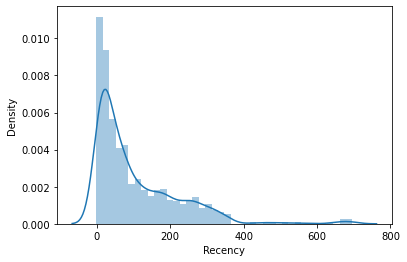

In [41]:
import seaborn as sns
x=RFMScores.Recency
ax=sns.distplot(x)

In [42]:
RFMScores.Frequency.describe()

count    3921.000000
mean       90.371079
std       217.796155
min         1.000000
25%        17.000000
50%        41.000000
75%        99.000000
max      7847.000000
Name: Frequency, dtype: float64

C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Frequency', ylabel='Density'>

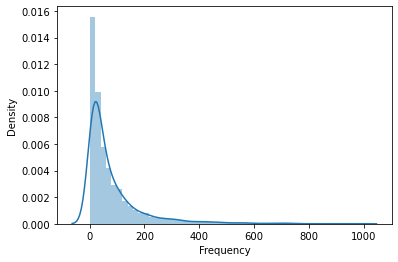

In [43]:
xf=RFMScores['Frequency'][RFMScores.Frequency<1000]
sns.distplot(xf)



In [ ]:
#Calculated recency frequency and monetary scores for all customers
#We have done Initial IDE and data cleaning 
##Perform log transformation to bring data into normal or near normal distribution
##Bring the data on same scale
#Used elbow method to find the adequate number of clusters for the given dataset

In [44]:
#split th e four segments using quantiles
Quantiles=RFMScores.quantile(q=[0.25,0.5,0.75])

In [45]:
Quantiles=Quantiles.to_dict()

In [46]:
Quantiles

{'Recency': {0.25: 21.0, 0.5: 60.0, 0.75: 161.0},
 'Frequency': {0.25: 17.0, 0.5: 41.0, 0.75: 99.0},
 'Monetary': {0.25: 300.03999999999996, 0.5: 651.8199999999999, 0.75: 1575.89}}

In [47]:
#
#Functions to create R,F,M segments
def RScoring(x,p,d):
    if x<=d[p][0.25]:
        return 1
    elif x<=d[p][0.50]:
        return 2
    elif x<=d[p][0.75]:
        return 3
    else:
        return 4
def FnMScoring(x,p,d):
    if x<=d[p][0.25]:
        return 4
    elif x<=d[p][0.50]:
        return 3
    elif x<=d[p][0.75]:
        return 2
    else:
        return 1
    

In [48]:
RFMScores['R']=RFMScores['Recency'].apply(RScoring,args=('Recency',Quantiles))

In [49]:
RFMScores['F'] = RFMScores['Frequency'].apply(FnMScoring, args=('Frequency',Quantiles))
RFMScores['M'] = RFMScores['Monetary'].apply(FnMScoring, args=('Monetary',Quantiles))

In [50]:
RFMScores[['R','F','M']].describe()

,R,F,M
count,3921.000000,3921.000000,3921.000000
mean,2.486100,2.517470,2.500383
std,1.122985,1.129278,1.118291
min,1.000000,1.000000,1.000000
25%,1.000000,2.000000,2.000000
50%,2.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000
max,4.000000,4.000000,4.000000


In [51]:
RFMScores.groupby('R')['R'].count()

R
1    1008
2     973
3     966
4     974
Name: R, dtype: int64

In [52]:
RFMScores.groupby('F')['F'].count()

F
1     980
2     962
3     949
4    1030
Name: F, dtype: int64

In [53]:
RFMScores.groupby('M')['M'].count()

M
1    980
2    980
3    980
4    981
Name: M, dtype: int64

In [54]:
RFMScores['RFMGroup']=RFMScores.R.map(str)+RFMScores.F.map(str)+RFMScores.M.map(str)

In [55]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMGroup
CustomerID,,,,,,,
12346.0,325,1,77183.60,4,4,1,441
12747.0,22,103,4196.01,2,1,1,211
12748.0,4,4596,33719.73,1,1,1,111
12749.0,22,199,4090.88,2,1,1,211
12820.0,44,59,942.34,2,2,2,222
...,...,...,...,...,...,...,...
18280.0,159,10,180.60,3,4,4,344
18281.0,3,7,80.82,1,4,4,144
18282.0,215,12,178.05,4,4,4,444


In [56]:
RFMScores['RFMScore']=RFMScores.R+RFMScores.F+RFMScores.M

In [57]:
RFMScores

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore
CustomerID,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9
12747.0,22,103,4196.01,2,1,1,211,4
12748.0,4,4596,33719.73,1,1,1,111,3
12749.0,22,199,4090.88,2,1,1,211,4
12820.0,44,59,942.34,2,2,2,222,6
...,...,...,...,...,...,...,...,...
18280.0,159,10,180.60,3,4,4,344,11
18281.0,3,7,80.82,1,4,4,144,9
18282.0,215,12,178.05,4,4,4,444,12


In [58]:
#Assign Loyalty Level to each customer
Loyalty_Level = ['Platinum', 'Gold', 'Silver', 'Bronze']
Score_cuts = pd.qcut(RFMScores.RFMScore, q = 4, labels = Loyalty_Level)
RFMScores['RFM_Loyalty_Level'] = Score_cuts.values
RFMScores.reset_index().head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,12346.0,325,1,77183.60,4,4,1,441,9,Silver
1,12747.0,22,103,4196.01,2,1,1,211,4,Platinum
2,12748.0,4,4596,33719.73,1,1,1,111,3,Platinum
3,12749.0,22,199,4090.88,2,1,1,211,4,Platinum
4,12820.0,44,59,942.34,2,2,2,222,6,Gold


In [59]:
#Validate the data for RFMGroup = 111
RFMScores[RFMScores['RFMGroup']=='111'].sort_values('Monetary', ascending=False).reset_index().head(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
0,18102.0,11,431,259657.30,1,1,1,111,3,Platinum
1,17450.0,2,337,194550.79,1,1,1,111,3,Platinum
2,17511.0,5,963,91062.38,1,1,1,111,3,Platinum
3,16684.0,11,277,66653.56,1,1,1,111,3,Platinum
4,14096.0,11,5111,65164.79,1,1,1,111,3,Platinum
5,15311.0,-1,2379,60767.90,1,1,1,111,3,Platinum
6,13089.0,5,1818,58825.83,1,1,1,111,3,Platinum
7,15061.0,4,403,54534.14,1,1,1,111,3,Platinum
8,14088.0,10,589,50491.81,1,1,1,111,3,Platinum
9,17841.0,-1,7847,40991.57,1,1,1,111,3,Platinum


In [60]:
#recency vs frequency
graph=RFMScores.query("Monetary < 50000 and Frequency < 2000")

In [61]:
graph

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
CustomerID,,,,,,,,,
12747.0,22,103,4196.01,2,1,1,211,4,Platinum
12749.0,22,199,4090.88,2,1,1,211,4,Platinum
12820.0,44,59,942.34,2,2,2,222,6,Gold
12821.0,95,6,92.72,3,4,4,344,11,Bronze
12822.0,70,46,948.88,3,2,2,322,7,Gold
...,...,...,...,...,...,...,...,...,...
18280.0,159,10,180.60,3,4,4,344,11,Bronze
18281.0,3,7,80.82,1,4,4,144,9,Silver
18282.0,215,12,178.05,4,4,4,444,12,Bronze


In [62]:
#handle negative and zero values so as to handle infinite numbers during log transformation
def handle_neg_n_zero(num):
    if num<=0:
        return 1
    else:
        return num

#Apply handle_neg_n_zero_fun to recency and monetary columns
RFMScores['Recency']=[handle_neg_n_zero(x) for x in RFMScores.Recency]
RFMScores['Monetary']=[handle_neg_n_zero(x) for x in RFMScores.Monetary]

#Perform log transformation to bring data into normal or near normal distribution
log_Tfd_Data=RFMScores[['Recency','Frequency','Monetary']].apply(np.log,axis=1).round(3)
    
    

C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


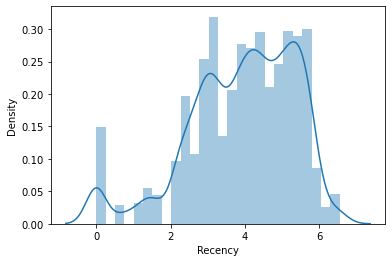

In [63]:
#Data distribution after data normalization for recency
Recency_Plot=log_Tfd_Data['Recency']
ax=sns.distplot(Recency_Plot)

C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


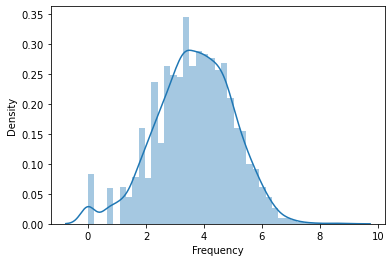

In [64]:
Freq_Plot=log_Tfd_Data['Frequency']
ax=sns.distplot(Freq_Plot)

C:\Users\91799\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


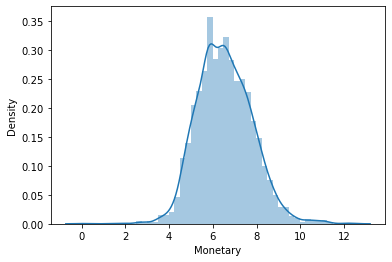

In [65]:
Monetary_Plot=log_Tfd_Data['Monetary']
ax=sns.distplot(Monetary_Plot)

In [66]:
from sklearn.preprocessing import StandardScaler
#Bring the data on same scale
scaleobj=StandardScaler()
Scaled_Data=scaleobj.fit_transform(log_Tfd_Data)

#Transform it back to dataframe
Scaled_Data=pd.DataFrame(Scaled_Data,index=RFMScores.index,columns=log_Tfd_Data.columns)

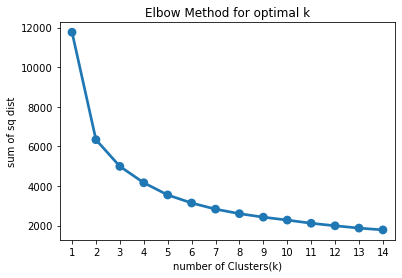

In [153]:
from sklearn.cluster import KMeans
sum_of_sq_dist={}
for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++',max_iter=1000)
    km=km.fit(Scaled_Data)
    sum_of_sq_dist[k]=km.inertia_
#Plot the graph for the sum of square distance values and number of clusters\
sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel('number of Clusters(k)')
plt.ylabel('sum of sq dist')
plt.title('Elbow Method for optimal k')
plt.show()

In [154]:
#Hence optimal no of clusters is 3

In [155]:
#Perform KMeans
KMeans_clust=KMeans(n_clusters=3,init='k-means++',max_iter=1000)
KMeans_clust.fit(Scaled_Data)
RFMScores['Cluster']=KMeans_clust.labels_
RFMScores.head(10)

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster
CustomerID,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2
12747.0,22,103,4196.01,2,1,1,211,4,Platinum,1
12748.0,4,4596,33719.73,1,1,1,111,3,Platinum,1
12749.0,22,199,4090.88,2,1,1,211,4,Platinum,1
12820.0,44,59,942.34,2,2,2,222,6,Gold,2
12821.0,95,6,92.72,3,4,4,344,11,Bronze,0
12822.0,70,46,948.88,3,2,2,322,7,Gold,2
12823.0,74,5,1759.50,3,4,1,341,8,Gold,0
12824.0,29,25,397.12,2,3,3,233,8,Gold,2


In [156]:
RFMScores.groupby('Cluster').count()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level
Cluster,,,,,,,,,
0,1335,1335,1335,1335,1335,1335,1335,1335,1335
1,953,953,953,953,953,953,953,953,953
2,1633,1633,1633,1633,1633,1633,1633,1633,1633


In [157]:
RFMScores.groupby('RFM_Loyalty_Level').count()

,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,Cluster
RFM_Loyalty_Level,,,,,,,,,
Platinum,1146,1146,1146,1146,1146,1146,1146,1146,1146
Gold,1170,1170,1170,1170,1170,1170,1170,1170,1170
Silver,928,928,928,928,928,928,928,928,928
Bronze,677,677,677,677,677,677,677,677,677


<Figure size 504x504 with 0 Axes>

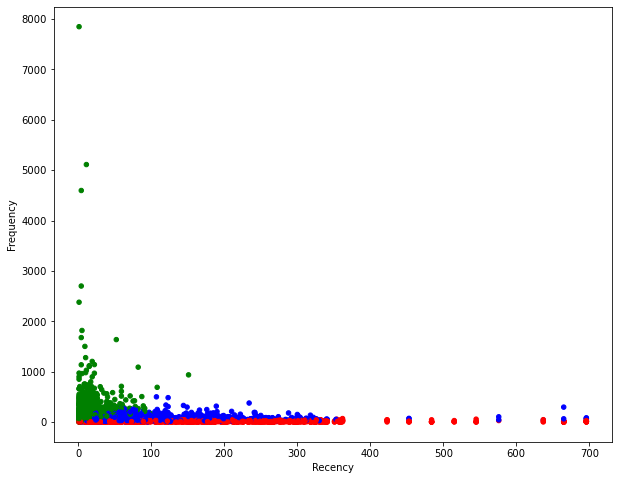

In [158]:
plt.figure(figsize=(7,7))

##Scatter Plot Frequency Vs Recency
Colors = ["red", "green", "blue"]
RFMScores['Color'] = RFMScores['Cluster'].map(lambda p: Colors[p])
ax = RFMScores.plot(    
    kind="scatter", 
    x="Recency", y="Frequency",
    figsize=(10,8),
    c = RFMScores['Color']
)

In [159]:
RFMScores.head()


,Recency,Frequency,Monetary,R,F,M,RFMGroup,RFMScore,RFM_Loyalty_Level,Cluster,Color
CustomerID,,,,,,,,,,,
12346.0,325,1,77183.60,4,4,1,441,9,Silver,2,blue
12747.0,22,103,4196.01,2,1,1,211,4,Platinum,1,green
12748.0,4,4596,33719.73,1,1,1,111,3,Platinum,1,green
12749.0,22,199,4090.88,2,1,1,211,4,Platinum,1,green
12820.0,44,59,942.34,2,2,2,222,6,Gold,2,blue
